\newpage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2


In [2]:
dataset_url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
df = pd.read_csv(dataset_url)
print("Initial dataset head:")
print(df.head())

Initial dataset head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


 # 1
 The goal is to predict whether a patient has heart disease (binary outcome) using various clinical and demographic features

# 2

In [3]:
from sklearn.preprocessing import StandardScaler
# checking missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Feature Scaling
# Identify numeric feature columns (excluding the target 'num')
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'num' in numeric_features:
    numeric_features.remove('num')

print("\nNumeric Feature Columns:")
print(numeric_features)

# Apply Standard Scaling to numeric features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nDataset after Scaling (first 5 rows):")
print(df.head())



Missing Values in Each Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Numeric Feature Columns:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Dataset after Scaling (first 5 rows):
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  num  
0  0.017197 -0.696631  1.087338  2.274579 -0.718306  0.653650

# 3

In [4]:
print("\n Dataset Information: ")
print(df.info())
print("\n Statistical Summary: ")
print(df.describe())


 Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

 Statistical Summary: 
                age           sex            cp      trestbps          chol  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean  -1

The descriptive statements:
The dataset includes 13 demographic and medical variables (e.g., age, sex, blood pressure), which is investigation on heart disease dataset.
The categorical variables are sex, cp, fbs, restecg, exang, slope, thal. Rest of them are numerical variables. Variable of num is the target.
The numerical variables (such as age, trestbps, chol, and thalach) show their distributions may be normal or slightly skewed.
The dataset contains 303 of observations (df.shape[0]) and includes some missing values.

# 4

In [5]:
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
print("\nValue counts for binary target 'num':")
print(df['num'].value_counts())


Value counts for binary target 'num':
num
0    164
1    139
Name: count, dtype: int64


# 5


Correlation matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.362605  0.093185  0.233214  0.098773  0.119000  0.145478   
thal      0.127389  0.380936  0.265246  0.1

<Axes: >

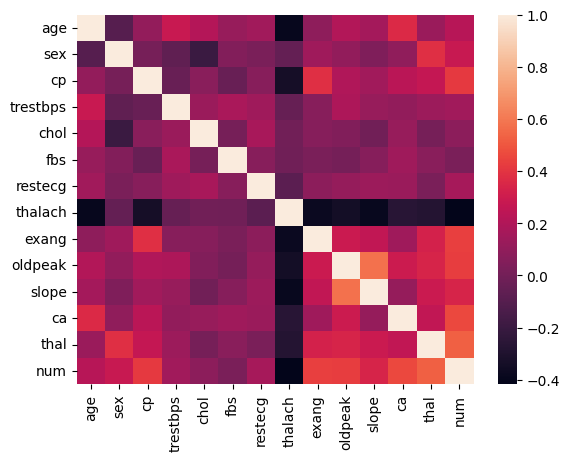

In [6]:
corr_matrix = df.corr()
print("\nCorrelation matrix:")
print(corr_matrix)
sns.heatmap(corr_matrix)

Thalach is highly negatively correlated with our target variable, heart disease, as well as with several other variables: ca, slope, oldpeak, exang, and thal. Therefore, for feature selection, thalach contains redundant information and is not essential.

# 6

In [7]:
df_clean = df.dropna()
print("\nNumber of observations after dropping missing values:", df_clean.shape[0])


Number of observations after dropping missing values: 297


# 7

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assume df_clean is DataFrame
df_clean = df_clean.copy()

# Select only numeric features
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('num')  # drop the target
X = df_clean[numeric_cols].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


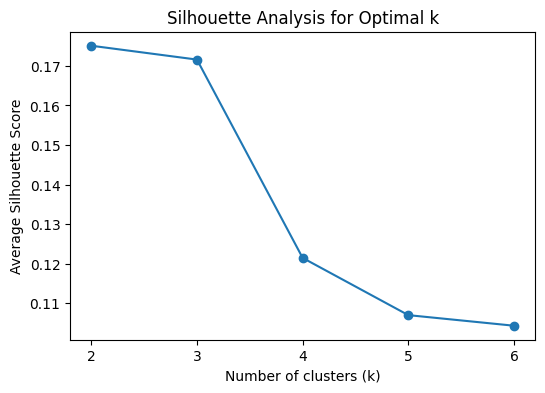

In [9]:
# Identify optimal number of clusters by using silhouette analysis
range_n_clusters = range(2, 7)
silhouette_scores = []
for k in range_n_clusters:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# pick the k with the highest silhouette score
best_k = range_n_clusters[np.argmax(silhouette_scores)]

plt.figure(figsize=(6,4))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xticks(range_n_clusters)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

Choose K=2

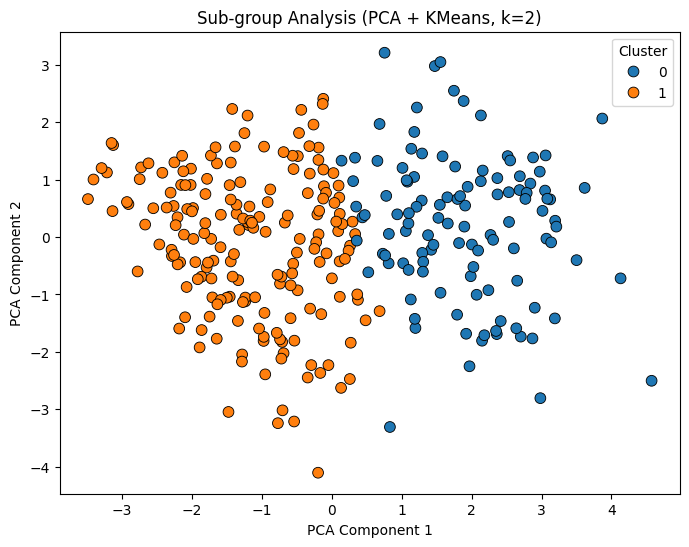

In [10]:

km_final = KMeans(n_clusters=best_k, random_state=1)
df_clean.loc[:, 'cluster'] = km_final.fit_predict(X_scaled)

pca = PCA(n_components=2, random_state=1)
X_pca = pca.fit_transform(X_scaled)
df_clean.loc[:, 'pca1'] = X_pca[:, 0]
df_clean.loc[:, 'pca2'] = X_pca[:, 1]


plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_clean,
    x='pca1', y='pca2',
    hue='cluster',
    palette='tab10',
    s=60,
    edgecolor='k'
)
plt.title(f'Sub‑group Analysis (PCA + KMeans, k={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 8

In [11]:
features = df_clean.drop(columns=['num', 'cluster', 'pca1', 'pca2'])
target = df_clean['num']

# Split the data using 30% for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 207
Test set size: 90


# 9

A logistic regression classifier and a random forest classifier will be used. The interpretability and straightforward coefficient analysis of logistic regression is outstanding. Moreover, the capability to demonstrating nonlinear relationships and its fitness to overfitting of random forest is fitting the dataset.

# 10

The metric will be classification accuracy, computed using .predict() and accuracy_score(). Another metric will be cross-validation score, computed using cross_val_score.

# 11

In [12]:
m_log = LogisticRegression(max_iter=120)

m_log.fit(X_train, y_train)
pred_prob = m_log.predict_proba(X_test)

m_log_pred = m_log.predict(X_test)
accuracy_score(y_test, m_log_pred) #the default probability cutoff in scikit is 0.5

0.8

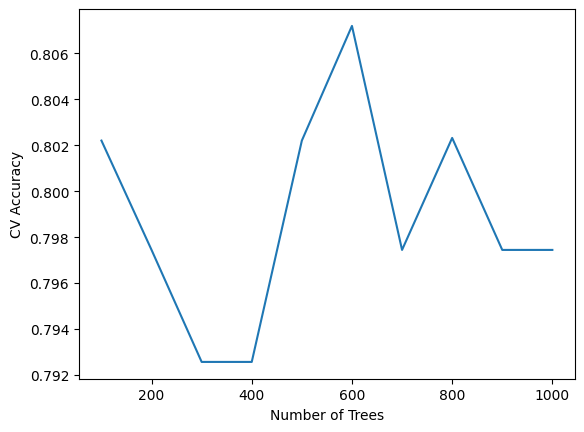

In [13]:
from sklearn.model_selection import cross_val_score

heart_scores_cv = []
ntrees = range(100, 1100, 100)
for n in ntrees:
    scores = cross_val_score(
        RandomForestClassifier(n_estimators=n, max_features=13, random_state=0, bootstrap=True, oob_score=True, criterion='gini'), 
        X_train, 
        y_train, 
        cv=5,
        scoring='accuracy'
    )
    heart_scores_cv.append(scores.mean())

plt.plot(ntrees, heart_scores_cv)
plt.xlabel('Number of Trees')
plt.ylabel('CV Accuracy')
plt.show()

# 12

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Build a pipeline: 1) scale to [0,1], 2) select k best χ² features, 3) logistic regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('selector', SelectKBest(score_func=chi2)), 
    ('clf', LogisticRegression(max_iter=120))
])

# Grid of hyperparameters: 
# - selector__k: number of features to keep
# - clf__C: regularization strength for logistic regression
param_grid = {
    'selector__k': [5, 10, 'all'],       # try selecting top 5, 10, or all features
    'clf__C':      [0.01, 0.1, 1, 10]     # different penalties
}

# 5‑fold CV search
grid_m_log_fs = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_m_log_fs.fit(X_train, y_train)

print("Best pipeline parameters:", grid_m_log_fs.best_params_)

# get help from Copilot

Best pipeline parameters: {'clf__C': 10, 'selector__k': 10}


# 13

In [15]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier

y_pred_log = m_log.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
f1_log  = f1_score(y_test,    y_pred_log)

# 2) Random Forest Classifier
best_n = ntrees[np.argmax(heart_scores_cv)]
m_rf = RandomForestClassifier(
    n_estimators=best_n,
    max_features=13,
    bootstrap=True,
    oob_score=True,
    criterion='gini',
    random_state=0
)
m_rf.fit(X_train, y_train)
y_pred_rf = m_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf  = f1_score(y_test,    y_pred_rf)

# 3) Logistic Regression with Feature Selection Pipeline (from Q12)
best_pipeline = grid_m_log_fs.best_estimator_

y_pred_pipe = best_pipeline.predict(X_test)
acc_pipe = accuracy_score(y_test, y_pred_pipe)
f1_pipe  = f1_score(y_test, y_pred_pipe)

# The results
print("Test Set Performance")
print(f"Logistic Regression: Accuracy = {acc_log:.3f}, F1 Score = {f1_log:.3f}")
print(f"Random Forest (n_estimators={best_n}): Accuracy = {acc_rf:.3f}, F1 Score = {f1_rf:.3f}")
print(f"LR + χ² Feature Selection Pipeline: Accuracy = {acc_pipe:.3f}, F1 Score = {f1_pipe:.3f}\n")


print("Classification Report: Logistic Regression: ")
print(classification_report(y_test, y_pred_log))
print("Classification Report: Random Forest: ")
print(classification_report(y_test, y_pred_rf))
print("Classification Report: LR + FS Pipeline: ")
print(classification_report(y_test, y_pred_pipe))

# get help from Copilot


Test Set Performance
Logistic Regression: Accuracy = 0.800, F1 Score = 0.780
Random Forest (n_estimators=600): Accuracy = 0.822, F1 Score = 0.810
LR + χ² Feature Selection Pipeline: Accuracy = 0.822, F1 Score = 0.800

Classification Report: Logistic Regression: 
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        51
           1       0.74      0.82      0.78        39

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90

Classification Report: Random Forest: 
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        51
           1       0.76      0.87      0.81        39

    accuracy                           0.82        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.83      0.82      0.82        90

Classification Report: LR + FS Pipeline: 
  

Logistic regression has a performance of 80% accuracy, and an f1 score of 0.78. Random forest has a accuracy of 81% and a f1 score of 0.795. Feature selection did not improve the logistic regression's accuracy. Feature selection did slightly improve the accuracy of random forest, from 80% before to 81% after. 

# 14

In [16]:
print(m_rf.feature_importances_)
X_test

[0.07511507 0.043322   0.11676354 0.08136822 0.07340561 0.00567642
 0.01282277 0.08365712 0.02805201 0.13640772 0.02294439 0.12390203
 0.1965631 ]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
139,-0.381100,0.686202,-0.165268,-0.380735,-0.032753,2.394438,1.016684,0.717808,-0.696631,1.173608,0.649113,-0.718306,-0.895552
236,0.172994,0.686202,0.877985,-0.096170,0.702378,2.394438,1.016684,-2.040846,1.435481,0.483451,2.274579,-0.718306,1.170051
51,1.170364,0.686202,0.877985,-0.665300,-1.348253,-0.417635,-0.996749,-0.420684,-0.696631,-0.551783,-0.976352,-0.718306,1.170051
295,-1.489288,0.686202,-1.208521,-0.665300,-1.735164,-0.417635,-0.996749,1.418418,-0.696631,-0.896862,-0.976352,-0.718306,-0.895552
245,1.392002,0.686202,0.877985,-0.665300,-0.187518,-0.417635,-0.996749,-3.442067,-0.696631,-0.034166,0.649113,-0.718306,-0.895552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.613640,0.686202,-2.251775,1.611220,-0.245555,2.394438,1.016684,-0.814778,-0.696631,-0.810592,0.649113,0.350219,-0.895552
252,1.059545,0.686202,0.877985,-0.209996,0.315467,-0.417635,-0.996749,-1.953270,1.435481,-0.724323,0.649113,0.350219,1.170051
19,-0.602738,0.686202,-1.208521,-0.096170,0.373504,-0.417635,-0.996749,0.936749,-0.696631,-0.379244,-0.976352,-0.718306,-0.895552
14,-0.270281,0.686202,-0.165268,2.294176,-0.922650,2.394438,-0.996749,0.542655,-0.696631,-0.465514,-0.976352,-0.718306,1.170051


Thal was the feature with the highest importance, followed by oldpeak and cp. In the context of predicting heart disease, thallium defect(what thal stands for) is a significant indicator of risk, which is useful in clinical contexts. 

# 16

Amanda did question 5, 10, 11, 13, 14, 16, 17.
Delphine did question 1, 2, 3, 4, 6, 7, 8, 9, 12.

# 17

https://github.com/DelphineShen/Assignment6